In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [26]:
# 데이터 읽기
df = pd.read_excel('202501.xlsx')

In [39]:
# 금속 컬럼 추출
metal_columns = [col for col in df.columns if '(ng/m3)' in col]
print("금속 컬럼 개수:", len(metal_columns))
print(metal_columns[:10], "...")

금속 컬럼 개수: 35
['Al(ng/m3)', 'Si(ng/m3)', 'S(ng/m3)', 'K(ng/m3)', 'Ca(ng/m3)', 'Ti(ng/m3)', 'V(ng/m3)', 'Cr(ng/m3)', 'Mn(ng/m3)', 'Fe(ng/m3)'] ...


In [28]:
# 음수 값 Nan 처리
df[metal_columns] = df[metal_columns].applymap(lambda x: np.nan if x < 0 else x)
df['Conc(ug/m3)'] = df['Conc(ug/m3)'].apply(lambda x: np.nan if x < 0 else x)

/tmp/ipython-input-4217171700.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[metal_columns] = df[metal_columns].applymap(lambda x: np.nan if x < 0 else x)


In [29]:
# 금속 총합 계산
df['Total_Metals'] = df[metal_columns].sum(axis=1)

In [46]:
# 전처리 및 금속 총합 계산 확인
df[['Conc(ug/m3)', 'Total_Metals'] + metal_columns[:6]].head(6)

,Conc(ug/m3),Total_Metals,Al(ng/m3),Si(ng/m3),S(ng/m3),K(ng/m3),Ca(ng/m3),Ti(ng/m3)
0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5694.55,793.97,834.70,2338.79,358.10,155.00,0.75
2,10.20,4748.94,1004.34,727.61,1361.91,281.32,124.75,0.59
3,6.90,4073.69,477.28,687.55,1387.49,267.52,128.43,NaN
4,6.26,4270.40,465.45,717.28,1441.36,266.17,138.57,0.28
5,8.44,4710.84,429.06,705.10,1999.81,238.93,134.96,0.58


In [30]:
# 상관 분석 대상 컬럼 설정
analysis_columns = ['Conc(ug/m3)', 'Total_Metals'] + metal_columns

In [23]:
# Pearson 상관관계 분석
pearson_corr = df[analysis_columns].corr(method='pearson')

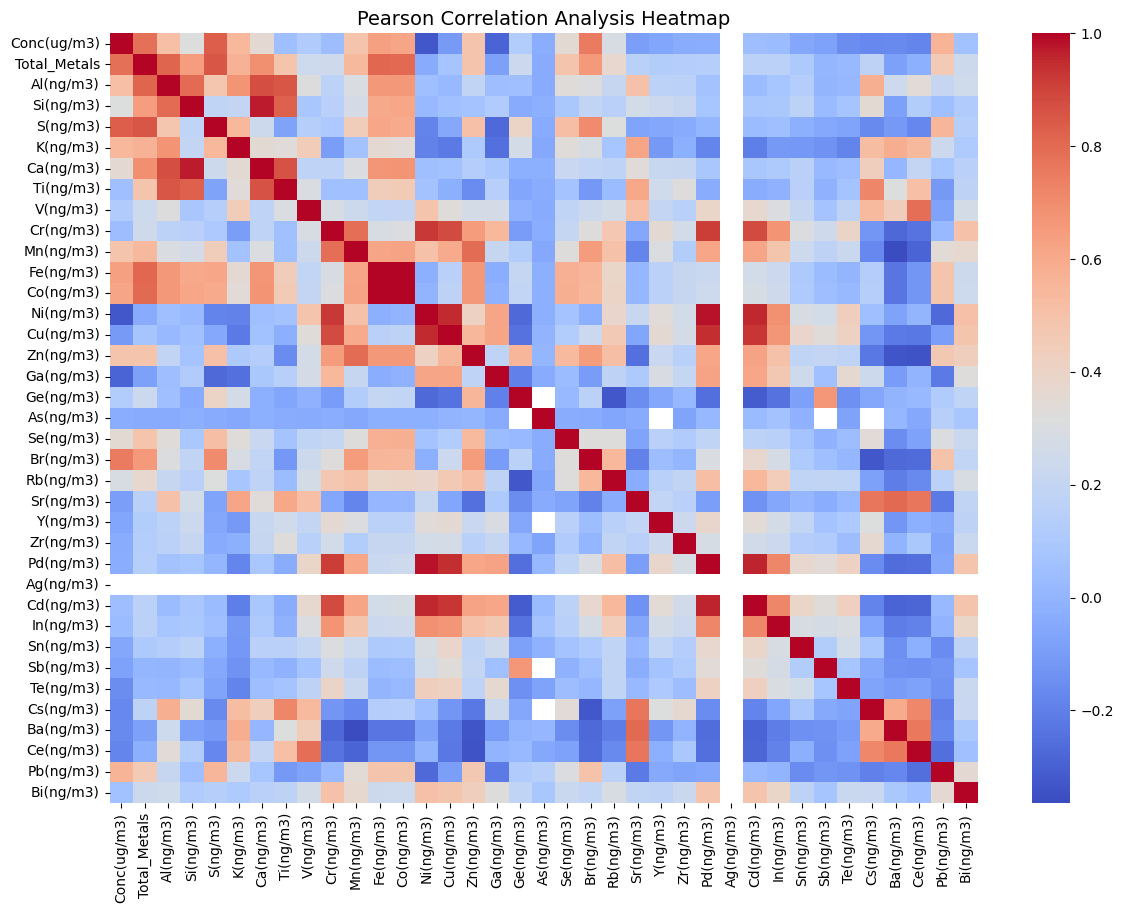

In [36]:
# Pearson 히트맵 그리기
plt.figure(figsize=(14, 10))
sns.heatmap(pearson_corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Pearson Correlation Analysis Heatmap", fontsize=14)

plt.show()

In [34]:
# Spearman 상관관계 분석
spearman_corr = df[analysis_columns].corr(method='spearman')

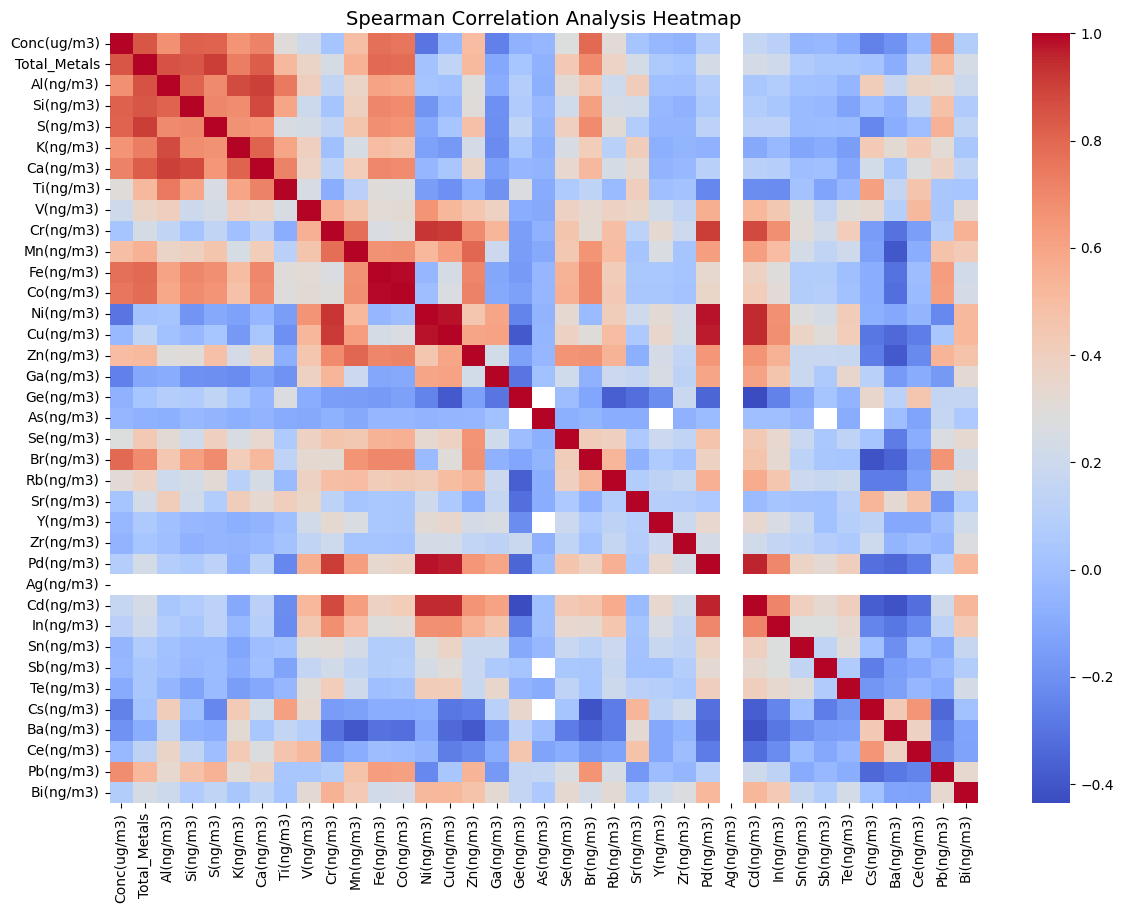

In [35]:
# Spearman 히트맵 그리기
plt.figure(figsize=(14, 10))
sns.heatmap(spearman_corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Spearman Correlation Analysis Heatmap", fontsize=14)

plt.show()

In [37]:
# 상관계수표 생성
print("Pearson 상관계수 - PM2.5와 상관이 높은 금속 TOP 5")
print(pearson_corr['Conc(ug/m3)'].sort_values(ascending=False).head(6))

print("Spearman 상관계수 - PM2.5와 상관이 높은 금속 TOP 5")
print(spearman_corr['Conc(ug/m3)'].sort_values(ascending=False).head(6))

Pearson 상관계수 - PM2.5와 상관이 높은 금속 TOP 5
Conc(ug/m3)     1.000000
S(ng/m3)        0.830394
Total_Metals    0.786692
Br(ng/m3)       0.751931
Fe(ng/m3)       0.633593
Co(ng/m3)       0.619837
Name: Conc(ug/m3), dtype: float64
Spearman 상관계수 - PM2.5와 상관이 높은 금속 TOP 5
Conc(ug/m3)     1.000000
Total_Metals    0.845229
Si(ng/m3)       0.816186
S(ng/m3)        0.814803
Br(ng/m3)       0.795097
Fe(ng/m3)       0.773501
Name: Conc(ug/m3), dtype: float64
